In [23]:
import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

# 各パス指定

In [24]:
dataset = 'model/keypoint_classifier/keypoint.csv'
model_save_path = 'model/keypoint_classifier/keypoint_classifier.keras'

# 分類数設定

In [25]:
NUM_CLASSES = 10

# 学習データ読み込み

In [26]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))

In [27]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

# モデル構築

In [29]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2, )),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [30]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dropout_2 (Dropout)                  │ (None, 42)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 20)                  │             860 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 20)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 10)                  │             210 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │             110 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,180 (4.61 KB)

 Trainable params: 1,180 (4.61 KB)

 Non-trainable params: 0 (0.00 B)

In [31]:
# モデルチェックポイントのコールバック
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# 早期打ち切り用コールバック
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [32]:
# モデルコンパイル
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# モデル訓練

In [33]:
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000
 1/26 ━━━━━━━━━━━━━━━━━━━━ 14s 590ms/step - accuracy: 0.0391 - loss: 2.4443
Epoch 1: saving model to model/keypoint_classifier/keypoint_classifier.keras
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.0626 - loss: 2.3646 - val_accuracy: 0.1567 - val_loss: 2.2028
Epoch 2/1000
 1/26 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.1172 - loss: 2.2465
Epoch 2: saving model to model/keypoint_classifier/keypoint_classifier.keras
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1721 - loss: 2.1969 - val_accuracy: 0.2310 - val_loss: 2.0083
Epoch 3/1000
 1/26 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.2734 - loss: 2.0845
Epoch 3: saving model to model/keypoint_classifier/keypoint_classifier.keras
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2301 - loss: 2.0334 - val_accuracy: 0.3569 - val_loss: 1.7736
Epoch 4/1000
 1/26 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.2812 - loss: 1.8681
Epoch 4: saving model to model/keypoint_classifier/keypoint_classifier.ker

In [34]:
# モデル評価
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9685 - loss: 0.2237 


In [35]:
# 保存したモデルのロード
model = tf.keras.models.load_model(model_save_path)

In [36]:
# 推論テスト
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
[1.4471431e-06 4.3296936e-06 2.6695234e-06 7.4130343e-03 5.9340935e-02
 9.8833069e-03 3.7472900e-02 8.7969363e-01 7.2983321e-04 5.4579913e-03]
7


# 混同行列

35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 824us/step


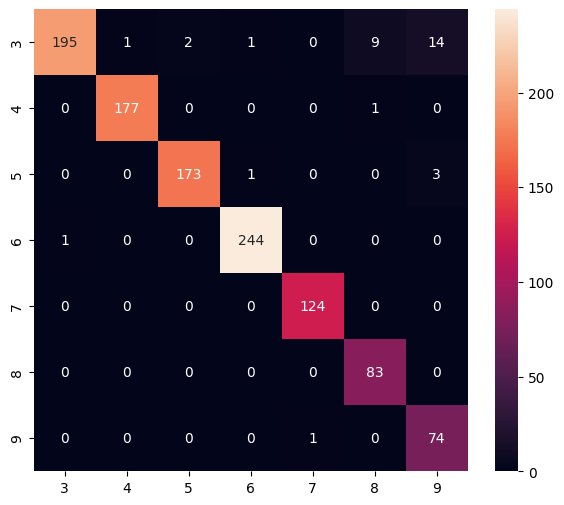

Classification Report
              precision    recall  f1-score   support

           3       0.99      0.88      0.93       222
           4       0.99      0.99      0.99       178
           5       0.99      0.98      0.98       177
           6       0.99      1.00      0.99       245
           7       0.99      1.00      1.00       124
           8       0.89      1.00      0.94        83
           9       0.81      0.99      0.89        75

    accuracy                           0.97      1104
   macro avg       0.95      0.98      0.96      1104
weighted avg       0.97      0.97      0.97      1104



In [37]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# Tensorflow-Lite用のモデルへ変換

In [38]:
# 推論専用のモデルとして保存
model.save(model_save_path, include_optimizer=False)

In [39]:
# モデルを変換(量子化)
tflite_save_path = 'model/keypoint_classifier/keypoint_classifier.tflite'

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: C:\Users\Windows\AppData\Local\Temp\tmps725dvx9\assets


INFO:tensorflow:Assets written to: C:\Users\Windows\AppData\Local\Temp\tmps725dvx9\assets


Saved artifact at 'C:\Users\Windows\AppData\Local\Temp\tmps725dvx9'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 42), dtype=tf.float32, name='input_layer_1')
Output Type:
  TensorSpec(shape=(None, 10), dtype=tf.float32, name=None)
Captures:
  2627943121552: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2627943121936: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2627943121168: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2627943134416: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2627943136336: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2627943134032: TensorSpec(shape=(), dtype=tf.resource, name=None)


6836

# 推論テスト

In [40]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

C:\Users\Windows\AppData\Local\Programs\Python\Python312\Lib\site-packages\tensorflow\lite\python\interpreter.py:457: UserWarning:     Warning: tf.lite.Interpreter is deprecated and is scheduled for deletion in
    TF 2.20. Please use the LiteRT interpreter from the ai_edge_litert package.
    See the [migration guide](https://ai.google.dev/edge/litert/migration)
    for details.
    
  warnings.warn(_INTERPRETER_DELETION_WARNING)


In [41]:
# 入出力テンソルを取得
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [42]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [43]:
%%time
# 推論実施
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

CPU times: total: 0 ns
Wall time: 0 ns


In [44]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[1.4471403e-06 4.3296895e-06 2.6695207e-06 7.4130343e-03 5.9340920e-02
 9.8832967e-03 3.7472900e-02 8.7969363e-01 7.2983210e-04 5.4579885e-03]
7
